# Housing Prices Estimation with Machine Learning and Neural Networks

The Boston Housing Prices dataset is a widely used benchmark in data science for exploring real estate market trends and building predictive models. This project was part of a final exam during a data science education program and evaluated by experienced professionals.

My primary goal is to analyze the factors influencing housing prices in Boston and develop a machine learning model and neural networks to predict housing values based on key variables such as crime rate, property tax, and socioeconomic factors.

From an analytical perspective, I aim to identify the most significant predictors of housing prices, understand their correlations, and detect potential trends or patterns in the data. Using data visualization and statistical methods, I will explore the relationships between different features and how they impact real estate valuations.

On the machine learning side, I will experiment with regression models—such as Linear Regression, Decision Trees, and Neural Networks an accurate price prediction model.

By the end of this project, I expect to gain a deeper understanding of how different factors influence housing prices, improve my skills in feature engineering and model optimization, and apply real-world data science techniques to a practical problem. This project will enhance my ability to work with structured datasets, build predictive models, and derive meaningful insights from data.

This project is structured in the follwing tasks:

##### 1. Exploratory data analysis, data cleansing and normalization

- a. Check the data set for missing or duplicate values and treat them accordingly. If necessary, format the values.
- b. Analyze the characteristics of the data with descriptive statistics (mean, mode, median, variance, deviation).
- c. Calculate and interpret the correlation value between the dependent variable and the independent variable.
- d. Create scatter plots using Matplotlib to show the relationship between three variables (RM, LSTAT, CRIM) and their effects on the mean Eigenhome values (MEDV).
- e. Scale the variables to prepare them for modeling method

##### 2. Clustering with Unsupervised Learning
- a. Group Boston's neighborhoods into economic status and accessibility using the K-Means clustering algorithm.Use the columns CRIM, LSTAT and DIS for this purpose.
- b. Use the silhouette coefficient to calculate the optimal number of clusters. The minimum number of clusters is two and the maximum is 10.
- c. Plot the silhouette coefficient for each cluster number
graphically in Matplotlib.
- d. Plot the data points with assigned cluster within of three 2-D scatter plots, calculate the number of associated data points of each cluster and interpret the result. (CRIM - LSTAT, LSTAT - DIS, DIS - CRIM)


##### 3. Modeling with Supervised Learning
- a. Multiple Linear Regression: Use only LSTAT, RM and DIS as independent variables.Create a 3D plot to visualize the hyperplane of the regression.
- b. K-Nearest Neighbors: Use Euclidean distance, five neighbors and the ball-tree algorithm
- c. Decision Tree:Use a maximum of three levels and Visualize the model
- d. A feedforward neural network with PyTorch: Use the Adam Optimizer, use the ReLU activation function and a total of three layers (input, inner, output), Use the Mean Squared Error for the loss function 3, Train the model for 100 epochs and print the loss for every 10th epoch,
- Compare the models with the test data using the mean squared error. Which model seems to be best for the prediction?

The dataset has the following 14 columns
- CRIM: Kriminalitätsrate pro Kopf nach Stadt
- ZN: Anteil der Wohngrundstücke für Parzellen über 25.000 Quadratfuß
- INDUS: Anteil der nicht Einzelhandelsbetriebsflächen pro Stadt
- CHAS: Dummy-Variable für den Charles River (1, wenn Fläche an den Fluss grenzt; sonst 0)
- NOX: Konzentration von Stickoxiden (Teile pro 10 Millionen)
- RM: Durchschnittliche Zimmeranzahl pro Wohnung
- AGE: Anteil der vor 1940 gebauten, selbst genutzten Wohnungen
- DIS: Gewichtete Entfernungen zu fünf Bostoner Arbeitszentren
- RAD: Index für die Erreichbarkeit von radialen Autobahnen
- TAX: Vollwertige Grundsteuer pro $10.000
- PTRATIO: Schüler-Lehrer-Verhältnis nach Stadt
- LSTAT: % der Bevölkerung mit niedrigem Status
- MEDV: Medianwert der selbstgenutzten Häuser in Tausenden von Dollar


In [80]:
# Import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
from summarytools import dfSummary

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Dataset

%matplotlib inline

## 1. Analysis, Cleansing and Normalization

In [10]:
# Load Dataset

try:
    df = pd.read_csv("HousingData.csv")
    print(df.head())
except IOError:
    print("File not found.")

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4    NaN  36.2  


### a) Check the data set for missing or duplicate values
Treat missing and duplicate entries accordingly. If necessary, format the values.

In [12]:
# First info on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    486 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [13]:
# Analyze missing values

missing_rows = df[df.isnull().any(axis=1)]
missing_counts = df.isnull().sum()

print(missing_rows)
print(missing_counts)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
4     0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
6     0.08829  12.5   7.87   NaN  0.524  6.012  66.6  5.5605    5  311   
9     0.17004  12.5   7.87   NaN  0.524  6.004  85.9  6.5921    5  311   
14    0.63796   0.0   8.14   NaN  0.538  6.096  84.5  4.4619    4  307   
35    0.06417   0.0   5.96   0.0  0.499  5.933  68.2  3.3603    5  279   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
473   4.64689   0.0  18.10   0.0  0.614  6.980  67.6  2.5329   24  666   
479  14.33370   0.0  18.10   NaN  0.614  6.229  88.0  1.9512   24  666   
482   5.73116   0.0  18.10   NaN  0.532  7.061  77.0  3.4106   24  666   
501   0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
505   0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
4       18.7    NaN  36.2  
6       15.2  12.43  22.9  
9       15.2  17.10  18.9  

In [14]:
# Check for duplicate values

duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


<Axes: >

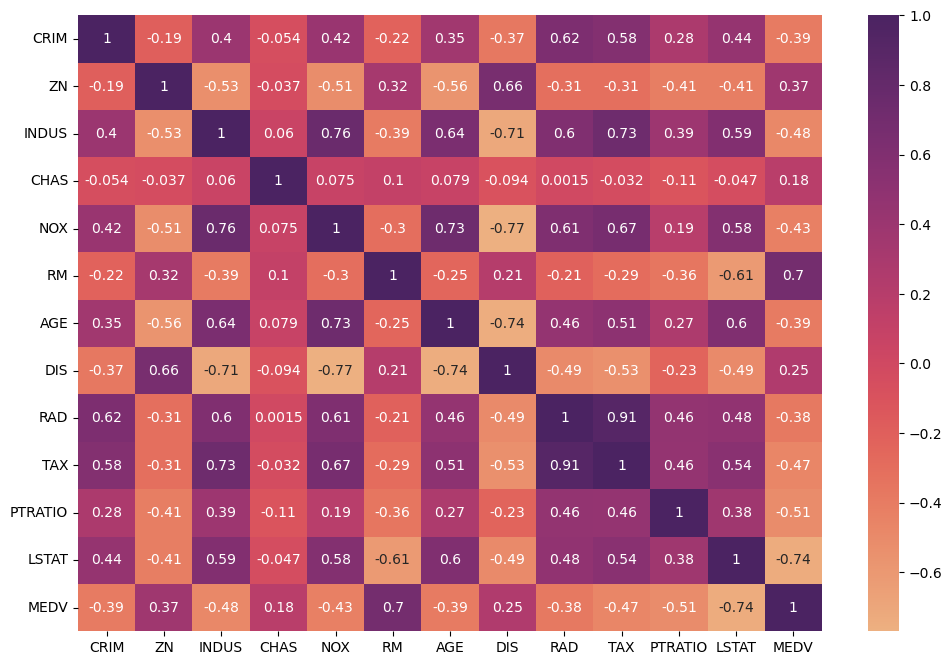

In [15]:
# Correlation Matrix

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))

sns.heatmap(data=corr, annot=True, cmap="flare")

**Comment:** 
- Instead of deleting all rows with missing values, which would decreade the dataset from 506 rows down to 394 (506-112) rows we will instead fill the missing values, each 20 cells, for the 6 rows by the highest correlations.
- This is a fast approch and better than deleting or filling it with max,mean,.. values.
- Another even more sophisticated apporach would be to fill the missing values by training random forest ML models for each row based on the other rows and fill it with predicted data from the model. Due to the time restirctions of the project and it non-prodcutive purpose we will proceed with the simpler correlation based filling.

In [17]:
# Fill empty CRIM values based on its correlation to RAD with mean value

#Create correlation dataframe
fill_crim = df.groupby("RAD")["CRIM"].mean()
print(fill_crim)


# Reusable filling function for missing target value based on the correlation value of the given dataframe
def fill_values(correlation_value, target, dataframe):
    if np.isnan(target):
        return dataframe[correlation_value]
    else:
        return target

# Apply function to column
df["CRIM"] = df.apply(lambda x: fill_values(x["RAD"], x["CRIM"], fill_crim), axis=1) 

# Show empty values(can still exists if both columns are empty for the same row)
missing_crim = df["CRIM"].isnull().sum()
print(f"Missing values: {missing_crim}")

RAD
1      0.036029
2      0.085163
3      0.097286
4      0.397060
5      0.700180
6      0.155567
7      0.154008
8      0.361430
24    13.011278
Name: CRIM, dtype: float64
Missing values: 0


In [18]:
# Fill empty ZN values based on its correlation to DIS with mean value

#Create correlation dataframe
fill_zn = df.groupby("DIS")["ZN"].mean()
print(fill_zn)

# Apply function to column
df["ZN"] = df.apply(lambda x: fill_values(x["DIS"], x["ZN"], fill_zn), axis=1) 

# Show empty values (can still exists if both columns are empty for the same row)
missing_zn = df["ZN"].isnull().sum()
print(f"Missing values: {missing_zn}")

DIS
1.1296      0.0
1.1370      0.0
1.1691      0.0
1.1742      0.0
1.1781      0.0
           ... 
9.2203     80.0
9.2229     17.5
10.5857    80.0
10.7103    60.0
12.1265    90.0
Name: ZN, Length: 412, dtype: float64
Missing values: 11


In [19]:
# Fill the still missing 11 ZN values based on its correlation to NOX with mean value

#Create correlation dataframe
fill_zn2 = df.groupby("NOX")["ZN"].mean()
print(fill_zn2)

# Apply function to column
df["ZN"] = df.apply(lambda x: fill_values(x["NOX"], x["ZN"], fill_zn2), axis=1) 

# Show empty values (can still exists if both columns are empty for the same row)
missing_zn = df["ZN"].isnull().sum()
print(f"Missing values: {missing_zn}")

NOX
0.385    80.0
0.389    55.0
0.392    80.0
0.394    90.0
0.398    80.0
         ... 
0.713     0.0
0.718     0.0
0.740     0.0
0.770     0.0
0.871     0.0
Name: ZN, Length: 81, dtype: float64
Missing values: 0


In [20]:
# Fill empty INDUS values based on its correlation to NOX with mean value

#Create correlation dataframe
fill_indus = df.groupby("NOX")["INDUS"].mean()
print(fill_indus)

# Apply function to column
df["INDUS"] = df.apply(lambda x: fill_values(x["NOX"], x["INDUS"], fill_indus), axis=1) 

# Show empty values (can still exists if both columns are empty for the same row)
missing_indus = df["INDUS"].isnull().sum()
print(f"Missing values: {missing_indus}")

NOX
0.385     1.76
0.389     2.25
0.392     3.64
0.394     3.75
0.398     3.37
         ...  
0.713    18.10
0.718    18.10
0.740    18.10
0.770    18.10
0.871    19.58
Name: INDUS, Length: 81, dtype: float64
Missing values: 0


In [21]:
# Fill empty AGE values based on its correlation to NOX with mean value

#Create correlation dataframe
fill_age = df.groupby("NOX")["AGE"].mean()
print(fill_age)

# Apply function to column
df["AGE"] = df.apply(lambda x: fill_values(x["NOX"], x["AGE"], fill_age), axis=1) 

# Show empty values (can still exists if both columns are empty for the same row)
missing_age = df["AGE"].isnull().sum()
print(f"Missing values: {missing_age}")

NOX
0.385          NaN
0.389    31.900000
0.392    25.550000
0.394    34.200000
0.398    24.450000
           ...    
0.713    90.105882
0.718    89.000000
0.740    95.669231
0.770    89.675000
0.871    97.050000
Name: AGE, Length: 81, dtype: float64
Missing values: 1


In [22]:
# Fill empty LSTAT values based on its correlation to AGE with mean value

#Create correlation dataframe
fill_lstat = df.groupby("AGE")["LSTAT"].mean()
print(fill_lstat)

# Apply function to column
df["LSTAT"] = df.apply(lambda x: fill_values(x["AGE"], x["LSTAT"], fill_lstat), axis=1) 

# Show empty values (can still exists if both columns are empty for the same row)
missing_lstat = df["LSTAT"].isnull().sum()
print(f"Missing values: {missing_lstat}")

AGE
2.9       4.8400
6.2          NaN
6.5       7.4400
6.6       6.2650
6.8       3.5300
          ...   
98.8     17.9550
98.9     17.7900
99.1     21.0800
99.3     16.7400
100.0    21.8285
Name: LSTAT, Length: 364, dtype: float64
Missing values: 13


In [23]:
# Fill empty LSTAT values based on its correlation to NOX with mean value

#Create correlation dataframe
fill_lstat2 = df.groupby("NOX")["LSTAT"].mean()
print(fill_lstat2)

# Apply function to column
df["LSTAT"] = df.apply(lambda x: fill_values(x["NOX"], x["LSTAT"], fill_lstat2), axis=1) 

# Show empty values (can still exists if both columns are empty for the same row)
missing_lstat2 = df["LSTAT"].isnull().sum()
print(f"Missing values: {missing_lstat2}")

NOX
0.385    12.930000
0.389     8.230000
0.392     7.910000
0.394     3.110000
0.398     7.455000
           ...    
0.713    16.504444
0.718    13.311667
0.740    21.050833
0.770    12.728750
0.871    19.702500
Name: LSTAT, Length: 81, dtype: float64
Missing values: 0


In [24]:
missing_counts2 = df.isnull().sum()
print(missing_counts2)

CRIM        0
ZN          0
INDUS       0
CHAS       20
NOX         0
RM          0
AGE         1
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT       0
MEDV        0
dtype: int64


In [25]:
# CHAS has no strong correlations, so we can not fill the empty values with this method. Also on Age row was not fillable. Instead we are dropping the remaing rows with missing values.

df = df.dropna()
df.shape

(485, 13)

### b) Analyze Statistics
Get mean, modus, median, variance and stddev from each column.

In [27]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CRIM[float64],Mean (sd) : 3.6 (8.7)min < med < max:0.0 < 0.3 < 89.0IQR (CV) : 3.5 (0.4),473 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACBUlEQVR4nO3XwW7aQBRG4TuF0AEqG0RrdmzZdcGSh+jD5iG85T2QDLKFY8cITXfdVC2xHSv5k/Otmcssjsa6LoRgwHv35a0vALzE+N4PnHNTM5t0nN+EEKqOZ4E//huqc266Wq1+RVG07DK8KIqzc+6RWNHXvRd1EkXRcr/fV3Ec120G53nu0zRdZlk2MTNCRS93P/1mZnEc10mSPHWYP+1wBvgLyxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokjIccfrvdHswscs51HdGEEKpXvBJEDRZqWZYP1+v152azGY1Go7rLjKIozs65R2LFYKE2TTP23s92u129Xq/Pbc/nee7TNF1mWTYxM0L95Ab99JuZzefzOkmSp47Hp696GchimYKEwV/UPnouYyxiH8i7DbXvMsYi9rG8KNQ8z33bwZfLxZuZlWXpj8fjrO350+n0zXs/2263brFYPLc5W1XV18Ph8CPLsu/OuaLtf+NNPIcQ/vkg/QZ/9H9FrqlyrQAAAABJRU5ErkJggg=="">",0(0.0%)
2,ZN[float64],Mean (sd) : 11.4 (23.3)min < med < max:0.0 < 0.0 < 100.0IQR (CV) : 12.5 (0.5),26 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtklEQVR4nO3YP2/aQBjH8ef4V5O65yAqsrF0yFCpQ0YvfQd9sVm7dSBSt2Rnj6KQYATBxXLcKVWlSiE+B8Ev/X5mnuNkvtjyuaqqDDh0rX1vAHiJzrYPOOf6ZtYLXH9TVdU6cBb449lQnXP94XD4zXs/CFl8sVjcO+fOiRVNbbuj9rz3gzRN10mS5HUWzrIsmkwmg9ls1jMzQkUjWx/9ZmZJkuSj0eghYP1+wAzwD16mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIaGz7w08xznXN7Ne4Pimqqr1a+4H+3OwoTrn+sPh8Jv3fhAyv1gs7p1z58T6NhxsqGbW894P0jRdJ0mS1xnMsiyaTCaD2WzWMzNCfQMOOVQzM0uSJB+NRg8Bo/1X3wz2hpcpSCBUSDj4R3+osiy7Zuadc6FL/HenBg1PWcx2eM12GmrDWPzj42M3ZHC1WnWLovgyHo/b7Xa71ovYk/l8vnTOfTezkHm5yJuespjt9prtLNSmsRRFEZVl+TnP8x9mVutlarPZdKIoOjo7O8tPTk7u63739fX1h4uLi6/j8fhjyN4b/mAtM3sMmGs67+M4HqVpuqh7ymLW/JptO058UahZlkV1v/ju7i6Ooujo9PTUHR8f/6o7f3t7G02n06Msy97f3Nxs6swul8va+/1bURSd0L3P5/P48vIy6Acry7K7Wq0+xXE8bbVaRb1dN5t/ujEURfHTAv5gTa7Zer1+d3V19exx4m+QwfBRWCqPkwAAAABJRU5ErkJggg=="">",0(0.0%)
3,INDUS[float64],Mean (sd) : 11.1 (6.9)min < med < max:0.5 < 9.6 < 27.7IQR (CV) : 13.0 (1.6),80 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC2ElEQVR4nO3dsW7aQBjA8e8KgQsgG4REtqwMlTpk5CH6sH2EDDxBViY2FEBGoaGAoVMqVQ0B39nNfcf/tx+xdH9Z4NydzfF4FCB0Xz77AoBL1D/7AvA3Y8ytiDQ8PmJ7PB5fy7qeUBBqQIwxt/1+/3uSJD3Xz1itVktjzI/YYiXUsDSSJOmNRqPXNE03RQdnWWbH43FvPp83RIRQUa00TTeDweCn4/DbUi8mEPyYggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUCHpRiufazCjXZV6rYEP1XZsZ67rMa1VpqJ53xKTT6QxGo9Gq6NrMmNdlXqvKQvW9I+52O5vn+ddms/nouDYzynWZ16rKO6rXavXpdNp7enpq7ff7WhUXB10q/47qulp9uVxyR8QfPJ6CCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKHC2fWoHttJksPhcOMwDvjHh6H6bCd520qy2WweRcT1mG9ARM7fUZ23k7CVBGW6aCuKy3YStpKgTPyYggqEChWCPSkFbvI8vxGRxBjjMjzYY5CiDdVzwkQCnrRT1uv1zW63+3Z/f1+r1WqFz1II+RikKEP1nTCRsCftlO12W7fWth4eHjZ3d3fLImNDPwYpylB9Jkwk/Ek7p91uu76iMtgnNVGG+sZjwkQCnrRrxK9+qECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKgQ9X+mfMS6CkkrQn1HzKuQtCLUd8S8CkkrQv1AjKuQqlTlu2sJFaWo+t21hIqyOG+tv+TrEqGiVK5vapQzX5d4jgoVuKNWwOMZLOd1nUCoJfN5Bst5XaddFGqWZbboB7+8vFgRkfV6bWezWet/jv/Mv71YLDrW2tZwODTdbvdXkbHPz892Mpm0sixrz2azbZGxIn7XnWWZzfO8Lu7/jUsOh0PdpZVLxvwGUYdwR8UudS8AAAAASUVORK5CYII="">",0(0.0%)
4,CHAS[float64],1. 0.02. 1.0,451 (93.0%)34 (7.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bMWrDQBRF

In [28]:
# Statistics dataframe

def calculate_statistics(df):
    stats = {}
    
    for column in df.columns:
        stats[column] = {
            'Mean': df[column].mean(),
            'Mode': df[column].mode()[0],
            'Median': df[column].median(),
            'Variance': df[column].var(),
            'Standard Deviation': df[column].std()
        }
    
    return pd.DataFrame(stats)

statistics_df = calculate_statistics(df)
statistics_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Mean,3.623986,11.367010,11.061570,0.070103,0.554047,6.296973,68.570385,3.778047,9.412371,405.824742,18.453608,12.636314,22.682887
Mode,13.011278,0.000000,18.100000,0.000000,0.538000,5.713000,100.000000,3.495200,24.000000,666.000000,20.200000,18.130000,50.000000
Median,0.263630,0.000000,9.581250,0.000000,0.538000,6.209000,76.900000,3.199200,5.000000,330.000000,19.000000,11.220000,21.200000
Variance,76.230865,543.111926,47.547619,0.065323,0.013284,0.489846,784.606022,4.345408,74.428772,28093.405172,4.716583,51.365018,86.780843
Standard Deviation,8.731029,23.304762,6.895478,0.255584,0.115254,0.699890,28.010820,2.084564,8.627211,167.610874,2.171770,7.166939,9.315624


### c) Correlations to Label MEDV
In this chapter, we are calclualting the correlations to the label "MEDV". But before, we are looking if the columns are normally distributed. If yes, the Pearson correlationcoefficient will be used, if not the Spearman correlation will be calculated.

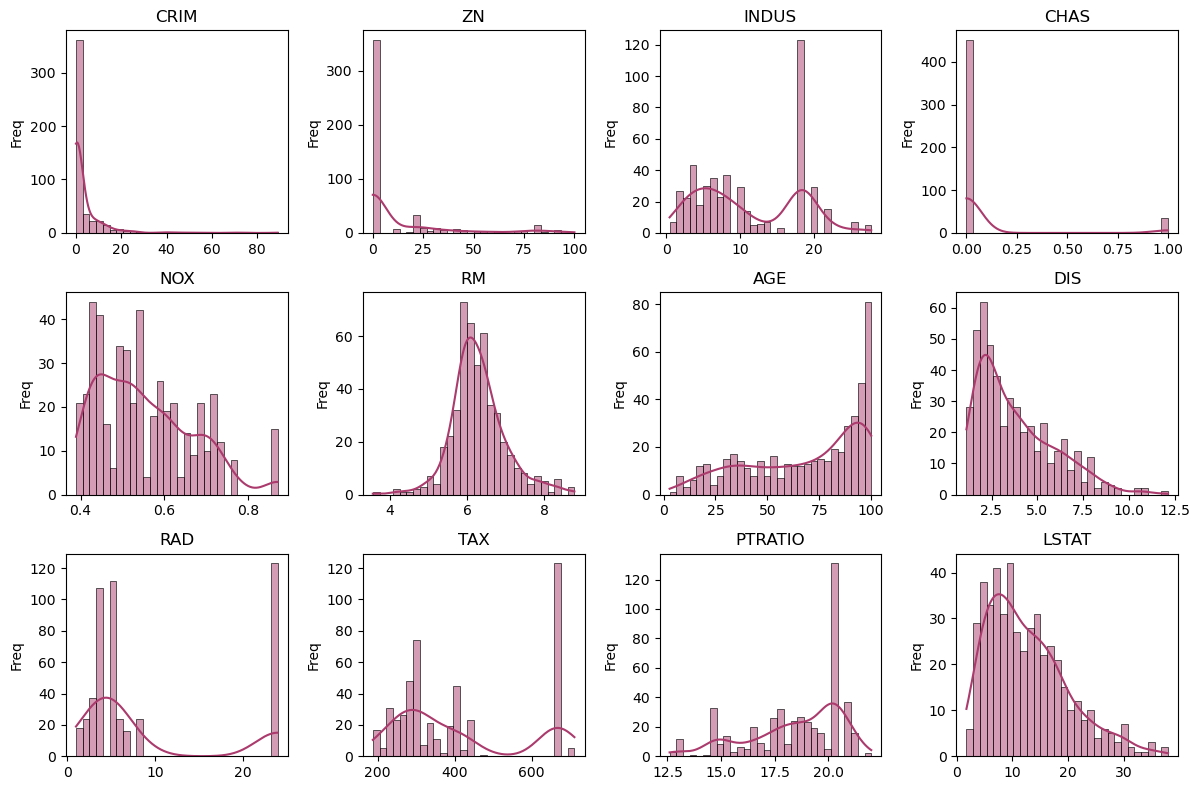

In [30]:
# Plot distributions of each column

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
axes = axes.flatten()

cols = df.columns[0:12]

for i,column in enumerate(cols):
    sns.histplot(df[column], bins=30, kde=True, color="#AB3A6D", ax=axes[i])
        
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Freq')
    

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [31]:
# Calculate Correlation Coefficients

normally_distributed = ["RM", "LSTAT", "NOX"]
corr = {}

for column in df.columns[0:12]:
    if column in normally_distributed:
        corr[column] = {
            "Pearson": df[column].corr(df["MEDV"], method="pearson")}
    else:
        corr[column] = {
            "Spearman": df[column].corr(df["MEDV"], method="spearman")}

corr_df = pd.DataFrame(corr)
corr_df 
                        



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
Spearman,-0.550141,0.448214,-0.583632,0.15003,NaN,NaN,-0.542424,0.446219,-0.34089,-0.56284,-0.56603,NaN
Pearson,NaN,NaN,NaN,NaN,-0.425668,0.710301,NaN,NaN,NaN,NaN,NaN,-0.722219


### d) Scatterplots for MEDV against RM, LSTAT and CRIM

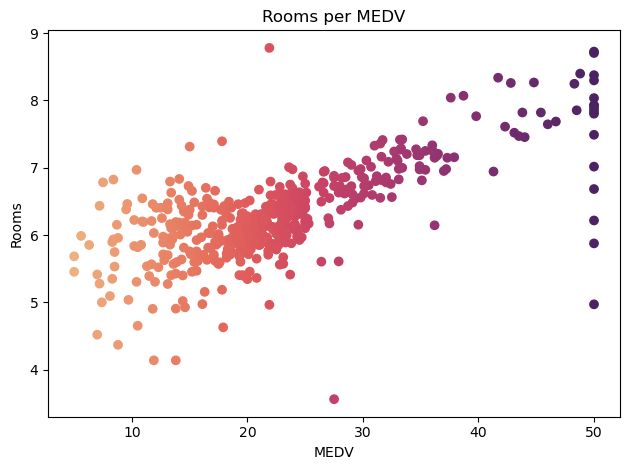

In [33]:
# MDEV - RM

fig, ax = plt.subplots()
ax.set_title("Rooms per MEDV")
ax.set_ylabel("Rooms")
ax.set_xlabel("MEDV")
ax.scatter(y=df["RM"],x=df["MEDV"], c=df["MEDV"], cmap="flare")
plt.tight_layout()
plt.show()

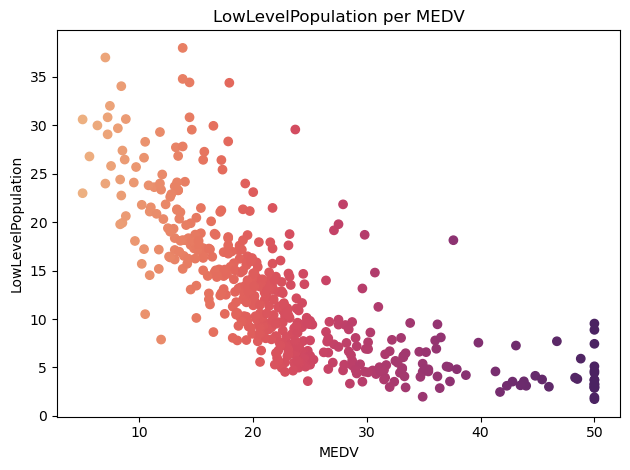

In [34]:
# MDEV - LSTAT

fig, ax = plt.subplots()
ax.set_title("LowLevelPopulation per MEDV")
ax.set_ylabel("LowLevelPopulation")
ax.set_xlabel("MEDV")
ax.scatter(y=df["LSTAT"],x=df["MEDV"], c=df["MEDV"], cmap="flare")
plt.tight_layout()
plt.show()

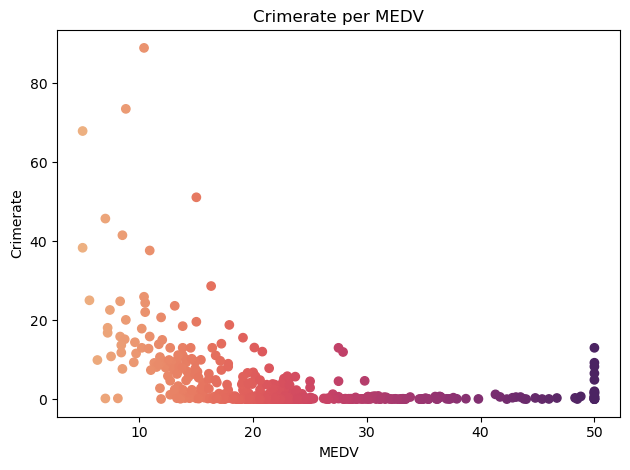

In [35]:
# Crim - LSTAT

fig, ax = plt.subplots()
ax.set_title("Crimerate per MEDV")
ax.set_ylabel("Crimerate")
ax.set_xlabel("MEDV")
ax.scatter(y=df["CRIM"],x=df["MEDV"], c=df["MEDV"], cmap="flare")
plt.tight_layout()
plt.show()

**Summary:**
- The explaratory data analysis showed some clear correlations for the housing prices.
- The more rooms the more likely for higher housing prices
- The lower the crimerate and lower share of lowerlevel population also higher hoisung prices are more likely.
- Besides these three features nearly all the other features have also mid-strong correlations with the housing price, except for the CHAS variable.

### e) Scaling the Dataset
In the last step we are going to split the label from the feature columns and scale the data for equal feature importance. As we know, that most of the features are not normally distributed we are using the MinMaxScaler, and not the StandardScaler. 

For supervised learning:
Before we are scaling we are spliting the dataset into labels and features and into train and test data. By doing it, we are avoiding data leakage, as the test data shouldn't be available at the time of the training and therefore not taken into account when scaling.

For unsupervised_learning:
As there will be no test dataset, we can scale the whole dataset directly.

In [38]:
# Features and label
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [39]:
# Train test split for supervised learning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# MinMax Scaling data for supervised learning

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [41]:
# MinMax Scaling for unsupervised Learning

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
df_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.309129,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.165975,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.165975,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.143154,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.143154,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,0.064708,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0.000633,0.00,0.420455,0.0,0.381743,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.152870,0.386667
481,0.000438,0.00,0.420455,0.0,0.381743,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,0.202815,0.346667
482,0.000612,0.00,0.420455,0.0,0.381743,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,0.107892,0.420000
483,0.001161,0.00,0.420455,0.0,0.381743,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.131071,0.377778


## 2. Unsupervised Learning: K-Means-Clustering

### a) K-Means Clustering
Clustering the scaled dataset using the CRIM, LSTAT and DIS columns.

In [44]:
# K-Means for Loop
warnings.filterwarnings('ignore')

# create new dataframe with the 3 columns
df_cluster_scaled = df_scaled[["CRIM", "LSTAT", "DIS"]].copy()

max_cluster = 10
inertia = {}
silhouette = {}
labels = {}

# Calculate KMeans for several cluster counts
for i in range(2,max_cluster):
    kmeans = KMeans(n_clusters = i, random_state = 42, init="k-means++")
    kmeans.fit(df_cluster_scaled)
    
    inertia[i] = kmeans.inertia_
    labels[i] = kmeans.labels_
    silhouette[i] = silhouette_score(df_cluster_scaled, kmeans.fit_predict(df_cluster_scaled))

print(f"Inertia: {inertia}")
print(f" Silhouette: {silhouette}")  

Inertia: {2: 22.034157528647594, 3: 14.483611612292503, 4: 11.329647112856529, 5: 9.538514516697113, 6: 7.972443855315898, 7: 7.00788031253925, 8: 6.225311994247524, 9: 5.672853263641528}
 Silhouette: {2: 0.41813614650286685, 3: 0.3933664414100678, 4: 0.3706902966226811, 5: 0.3718998908044757, 6: 0.3545794459865826, 7: 0.34277788297754436, 8: 0.3399599444142977, 9: 0.3288073725017183}


### b,c) Silhouette Coefficient

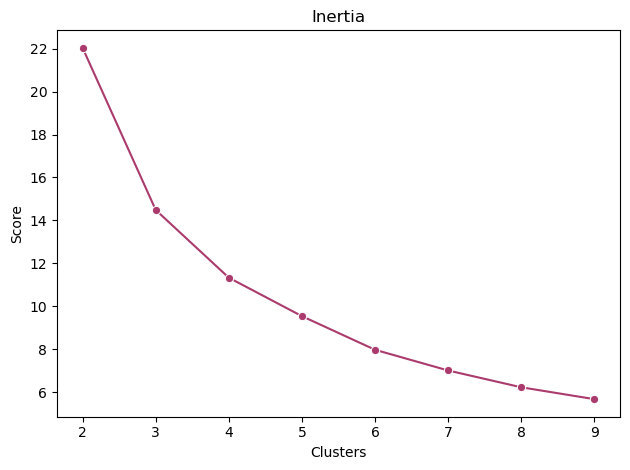

In [46]:
# Visualize Inertia

fig, ax = plt.subplots()
ax.set_title("Inertia")
ax.set_ylabel("Score")
ax.set_xlabel("Clusters")

sns.lineplot(x = inertia.keys(), y= inertia.values(), marker="o", color="#AB3A6D")

plt.tight_layout()
plt.show()

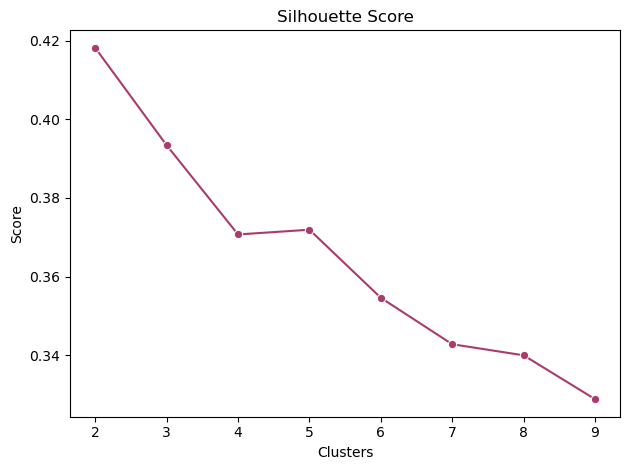

In [47]:
# Visualize Silhouette Score

fig, ax = plt.subplots()
ax.set_title("Silhouette Score")
ax.set_ylabel("Score")
ax.set_xlabel("Clusters")

sns.lineplot(x = silhouette.keys(), y= silhouette.values(), marker="o", color="#AB3A6D")

plt.tight_layout()
plt.show()

### d) Visualize Clusters
The upper ellbow curve of the Inertia graph is at 3 clusters, but not very strong. The lower ellbow can only be assumed at 5 clusters. The silhouette score only declining from 2 clusters, but still high at 3 clusters and with a small local maximum at 5 clusters.

For these reasons we select 3 clusters to proceed.

First we are adding the cluster numbers to the unscaled dataframe and count the entries per cluster and than we are visualising the clusters.

In [49]:
# Create and Count

df["Clusters K=3"] = labels[3]

df.value_counts("Clusters K=3")

Clusters K=3
0    220
1    137
2    128
Name: count, dtype: int64

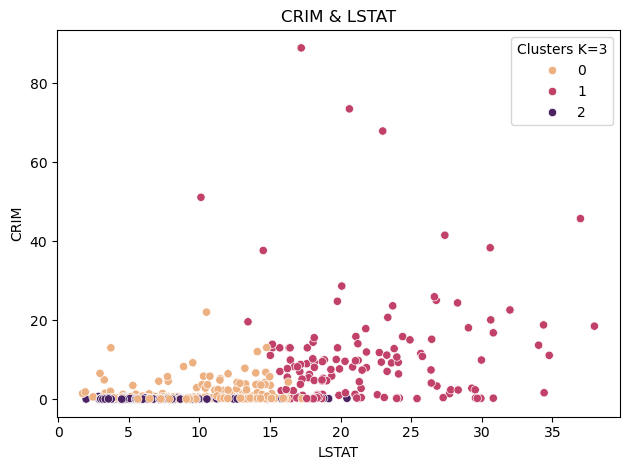

In [50]:
# Scatterplot CRIM & LSTAT
fig, ax = plt.subplots()
ax.set_title("CRIM & LSTAT")
ax.set_ylabel("CRIM")
ax.set_xlabel("LSTAT")

sns.scatterplot(x = df["LSTAT"], y=df["CRIM"], marker="o", hue=df["Clusters K=3"], palette="flare")

plt.tight_layout()
plt.show()

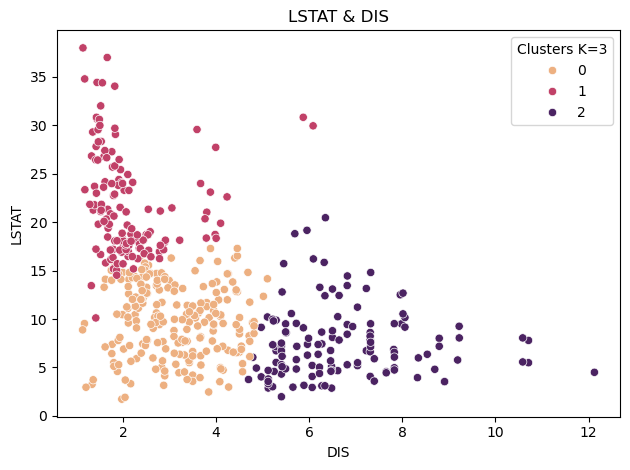

In [51]:
# Scatterplot LSTAT & DIS

fig, ax = plt.subplots()
ax.set_title("LSTAT & DIS")
ax.set_ylabel("LSTAT")
ax.set_xlabel("DIS")

sns.scatterplot(x = df["DIS"], y=df["LSTAT"], marker="o", hue=df["Clusters K=3"], palette="flare")

plt.tight_layout()
plt.show()

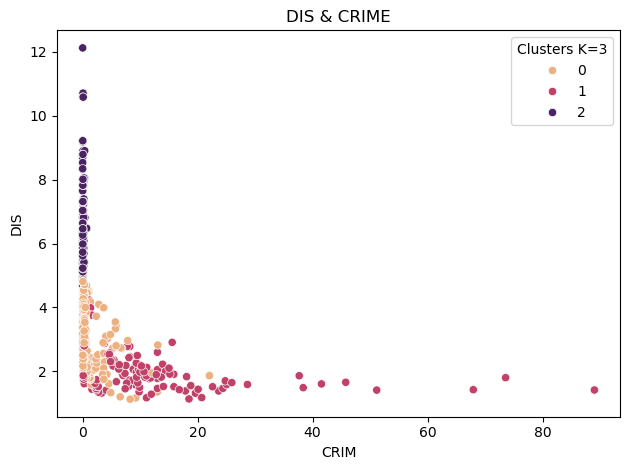

In [52]:
# Scatterplot DIS & CRIME

fig, ax = plt.subplots()
ax.set_title("DIS & CRIME")
ax.set_ylabel("DIS")
ax.set_xlabel("CRIM")

sns.scatterplot(x = df["CRIM"], y=df["DIS"], marker="o", hue=df["Clusters K=3"], palette="flare")

plt.tight_layout()
plt.show()

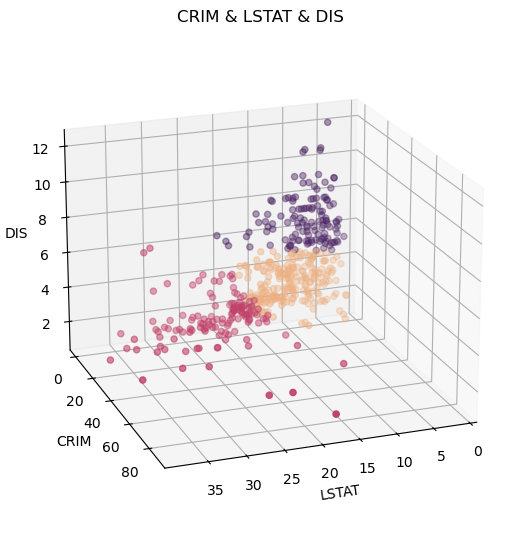

In [53]:
# 3D Clustering: CRIM & LSTAT & DIS
fig = plt.figure(figsize=(5,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.set_title("CRIM & LSTAT & DIS")
ax.set_xlabel("LSTAT")
ax.set_ylabel("CRIM")
ax.set_zlabel("DIS")

ax.scatter(xs=df["LSTAT"], ys=df["CRIM"], zs=df["DIS"], c=df["Clusters K=3"] , cmap="flare")

ax.view_init(20,70,0)
plt.tight_layout()
plt.show()

**Summary:**
- The clustering of the dataset based on the Criem rate, the LowLevel porpulation and distance to the working zones had no clear go-to cluster number, but selecting 3 clusters looks like a good decision.
- The first visualisation is not very good, because the clusters are overlapping due to the important feature "DIS" which is missing here.
- The other two 2D visualisation are showing the cluster seperation more clearly.
- Really helpful is the 3D viszaulisation which gives a good look and good understanding for the clustering.
- To improve the clustering all features could be selected and a PCA transformation could be applied.

## 3. Supervised Learning
In this chapter we are using different supervise machine learning algorithms, train them on the data and evaluate the outcome.

### a) Multiple Linear Regression
Linear Regression on the features LSTAT, RM, and DIS

In [57]:
# Feature data

X_train_scaled_LR =  X_train_scaled[["LSTAT", "RM", "DIS"]].copy()
X_test_scaled_LR =  X_test_scaled[["LSTAT", "RM", "DIS"]].copy()

In [58]:
# Linear Model
model_lin = LinearRegression()
model_lin.fit(X_train_scaled_LR, y_train)
predict_lin = model_lin.predict(X_test_scaled_LR)

mse_lin = mean_squared_error(y_test, predict_lin)

print(f" Intercept: {model_lin.intercept_}")
print(f" Coefficients: {pd.DataFrame(zip(X_train_scaled_LR.columns, model_lin.coef_))}")
print(f"MSE: {mse_lin}")

 Intercept: 17.05751539400838
 Coefficients:        0          1
0  LSTAT -23.116539
1     RM  28.389102
2    DIS  -5.646437
MSE: 24.05904905646579


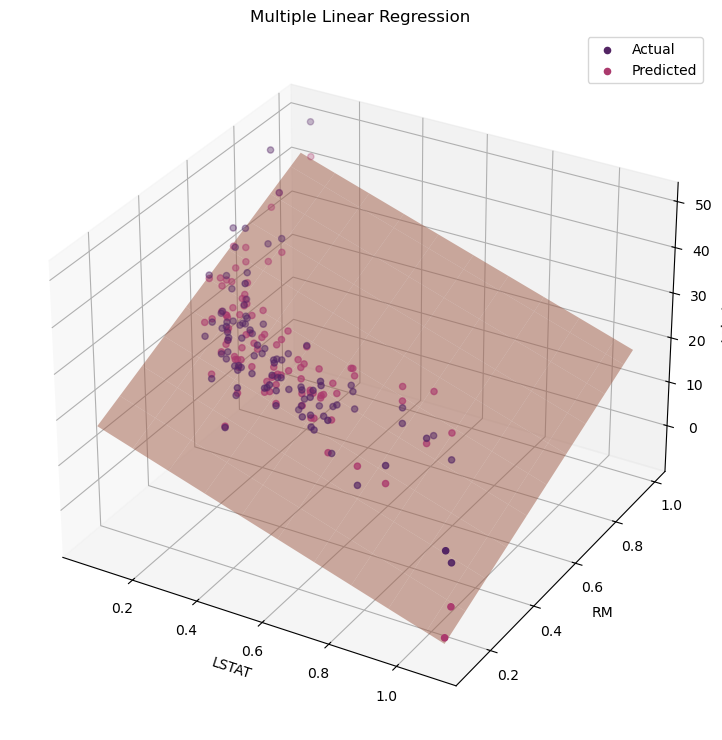

In [59]:
#3D plot of the Hyper Regression Line

# Extract coefficients
b0 = model_lin.intercept_  # Intercept
b1, b2, b3 = model_lin.coef_  # Coefficients for LSTAT, RM, DIS

# Define mesh grid for LSTAT and RM
lstat_range = np.linspace(X_test_scaled_LR["LSTAT"].min(), X_test_scaled_LR["LSTAT"].max(), 20)
rm_range = np.linspace(X_test_scaled_LR["RM"].min(), X_test_scaled_LR["RM"].max(), 20)
lstat_grid, rm_grid = np.meshgrid(lstat_range, rm_range)
dis_mean = X_test_scaled_LR["DIS"].mean()

# Compute the predicted y values for the regression plane
y_plane = b0 + b1 * lstat_grid + b2 * rm_grid + b3 * dis_mean

#3d plot
fig = plt.figure(figsize=(10, 7))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter(xs=X_test_scaled_LR["LSTAT"], ys=X_test_scaled_LR["RM"], zs=y_test, color="#532564", label="Actual")
ax.scatter(xs=X_test_scaled_LR["LSTAT"], ys=X_test_scaled_LR["RM"], zs=predict_lin, color="#AB3A6D", label="Predicted")
ax.plot_surface(X=lstat_grid, Y=rm_grid, Z=y_plane, rstride=2, cstride=2, alpha = 0.5, color="#E88466")

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("Label")
ax.set_title("Multiple Linear Regression")
ax.legend()
plt.show()

### b) KNN Regression
Building a KNN model with euklidian distance, 5 neighbors and the ball-tree algorithm

In [61]:
# Fitting model
model_knn = KNeighborsRegressor(n_neighbors=5, p=2, metric="minkowski", algorithm="ball_tree")
model_knn.fit(X_train_scaled, y_train)
predict_knn = model_knn.predict(X_test_scaled)

mse_knn = mean_squared_error(predict_knn, y_test)

print(f"MSE: {mse_knn}")

MSE: 14.86819793814433


### c) Decision Tree Regression
3-Level Decision Tree with tree visualization

In [63]:
# Fitting model
model_tree = DecisionTreeRegressor(max_depth=3)
model_tree = model_tree.fit(X_train_scaled, y_train)
predict_tree = model_tree.predict(X_test_scaled)

mse_tree = mean_squared_error(predict_tree, y_test)

print(f"MSE: {mse_tree}")

MSE: 26.924593613250607


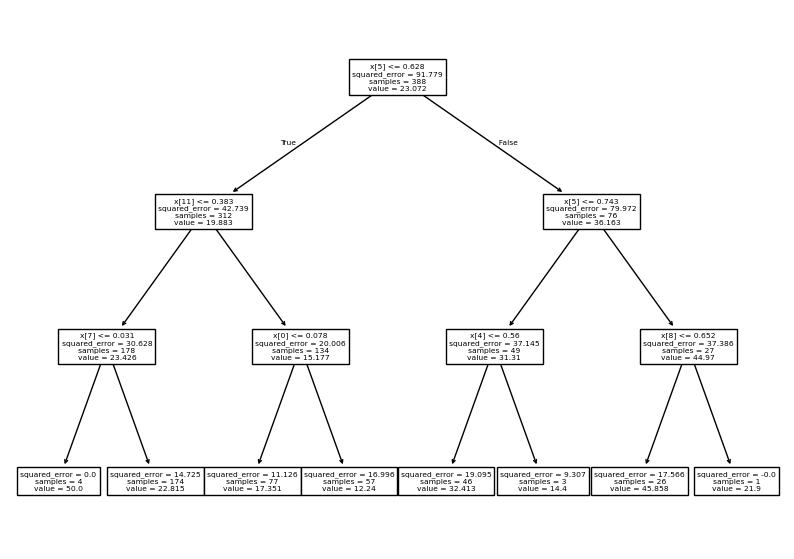

In [64]:
# Tree visualization
fig = plt.figure(figsize=(10, 7))

plot_tree(model_tree)

plt.show()

### d) Feedforward 3-layer Neural Network Regression with PyTorch
ReLu, ADAM optimizer, MSE loss, 100 epochs, verbose 10, without backward_propagation

In [307]:
# Hyperparameters
input_layer = len(df.columns)-1
output_layer = 1
hidden_layer = input_layer*3
epochs=100
learning_rate=0.01
loss_fn = nn.MSELoss() 
activation_fn = nn.ReLU()

#PyTorch model class
class RegressionNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation_fn):
        super(RegressionNN, self).__init__()
        self.flatten = nn.Flatten()
        self.activation_fn = activation_fn
        self.network = nn.Sequential(
            nn.Linear(input_layer, hidden_layer),
            self.activation_fn,
            nn.Linear(hidden_layer, output_size),
        )

    # Forward pass in NN layers
    def forward(self, x):
        x = self.flatten(x)
        logits = self.network(x)
        return logits

    # Train model
    def fit(self, train_loader, test_loader, optimizer, loss_fn, epochs):
            loss_list = []
            best_mse = np.inf
            mse_history = []

            # training loop
            for epoch in range(epochs):
                dict_cc = {}
                for i, (features, labels) in enumerate(train_loader):
                    features = features.float()
                    labels = labels.float()

                    # forward pass
                    outputs = self(features)
                    loss = loss_fn(outputs, labels.squeeze(dim=1))
                    
                    # update weigths
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                
                
                dict_cc["Epochs"] = epoch + 1
                dict_cc["Loss"] = round(loss.item(), 4)
                loss_list.append(dict_cc)

                with torch.no_grad():  # No gradients needed
                    test_predictions = []
                    test_labels = []

                    for features, labels in test_loader:
                        features = features.float()
                        labels = labels.float()                        
                        preds = self(features)
                        test_predictions.append(preds)
                        test_labels.append(labels)

                    # Concatenate predictions and labels
                    test_predictions = torch.cat(test_predictions, dim=0)
                    test_labels = torch.cat(test_labels, dim=0)

                    # Compute MSE
                    mse = float(loss_fn(test_predictions, test_labels.squeeze(dim=1)))
                    mse_history.append(mse)

                    # Store best MSE
                    if mse < best_mse:
                        best_mse = mse


                if (epoch + 1)%10 == 0:
                    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, MSE: {mse:.4f}, Best MSE: {best_mse:.4f}") 
            print(
                f"Finished Training for {epochs} epochs!"
            )
    
            return round(loss.item(), 4), loss_list, mse_history, best_mse

# Class Dataset
class Data(Dataset):
    def __init__(self, xy):
        self.x = torch.from_numpy(xy[:, 1:]).float()
        self.y = torch.from_numpy(xy[:, [0]]).float()
        self.n_samples = xy.shape[0]

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


# Generate Tensordata
dataset = Data(df.values)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
generator1 = torch.Generator().manual_seed(42)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size], generator=generator1)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)



# Execute model
model_nn = RegressionNN(input_layer, hidden_layer, output_layer, activation_fn)
optimizer = optim.Adam(model_nn.parameters(), learning_rate)
model_nn = model_nn.fit(train_loader, test_loader, optimizer, loss_fn, epochs)

Epoch [10/100], Loss: 58.4349, MSE: 84.4920, Best MSE: 81.0561
Epoch [20/100], Loss: 11.3586, MSE: 80.9618, Best MSE: 80.9618
Epoch [30/100], Loss: 1.9459, MSE: 91.2556, Best MSE: 80.9618
Epoch [40/100], Loss: 12.8775, MSE: 81.5428, Best MSE: 80.5925
Epoch [50/100], Loss: 23.4199, MSE: 80.7141, Best MSE: 80.4759
Epoch [60/100], Loss: 3.0645, MSE: 81.7858, Best MSE: 80.3314
Epoch [70/100], Loss: 5.0303, MSE: 80.4492, Best MSE: 80.3314
Epoch [80/100], Loss: 66.3115, MSE: 80.6504, Best MSE: 80.3314
Epoch [90/100], Loss: 16.4231, MSE: 80.3416, Best MSE: 80.3314
Epoch [100/100], Loss: 27.1836, MSE: 81.2462, Best MSE: 80.3221
Finished Training for 100 epochs!


### e) MSE Comparison
Now we are comparing the MSE of the different models to identify the best fitting ML model to approach the regression of the House pricing.

In [309]:
# Gather MSE results

dict_mse = {}

dict_mse["Linear Reg"] = mse_lin
dict_mse["KNN Reg"] = mse_knn
dict_mse["DTree Reg"] = mse_tree
dict_mse["NN Reg"] = model_nn[3]

df_mse = pd.DataFrame(dict_mse, index=[1]) #.reset_index()
df_mse

,Linear Reg,KNN Reg,DTree Reg,NN Reg
1,24.059049,14.868198,26.924594,80.322098


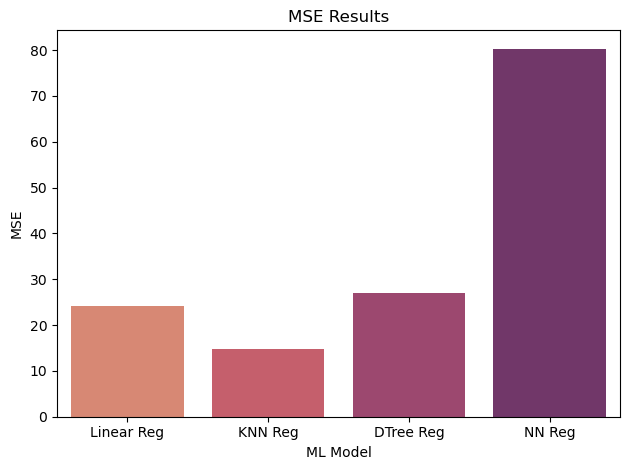

In [300]:
# Visualize MSEs

fig, ax = plt.subplots()
ax.set_title("MSE Results")
ax.set_ylabel("MSE")
ax.set_xlabel("ML Model")
sns.barplot(df_mse, palette="flare")
plt.tight_layout()
plt.show()

build on these results, ensuring that the predictive models are both robust and interpretable.


## Project Summary

This project focused on analyzing the Boston Housing Prices dataset using a multi-step approach combining exploratory data analysis (EDA), unsupervised clustering, and supervised learning techniques. The work was structured into three main tasks:

##### 1. Exploratory Data Analysis, Data Cleansing, and Normalization

- **Missing and Duplicate Values:** We began by checking the dataset for missing or duplicate entries, addressing these issues through imputation or removal and ensuring the data values were correctly formatted.  
- **Descriptive Statistics:** We calculated key statistical measures such as mean, mode, median, variance, and standard deviation for each variable, providing insight into the distribution and spread of the data.  
- **Correlation Analysis:** The correlation between the dependent variable (MEDV) and independent variables was computed and interpreted, highlighting which factors (e.g., RM, LSTAT, CRIM) had the strongest associations with housing prices.  
- **Scatter Plots:** Using Matplotlib, scatter plots were created for RM, LSTAT, and CRIM against MEDV, which visually demonstrated how these variables relate to mean housing values.  
- **Data Scaling:** Finally, the variables were scaled to ensure that they were well-prepared for the subsequent modeling phases.

##### 2. Clustering with Unsupervised Learning

- **K-Means Clustering:** We applied the K-Means algorithm on the columns CRIM, LSTAT, and DIS to group Boston’s neighborhoods based on economic status and accessibility.  
- **Silhouette Analysis:** To determine the optimal number of clusters, we computed and plotted the silhouette coefficient for cluster counts ranging from 2 to 10.  Usually this 
- **Cluster Visualization:** The data points, with their assigned cluster labels, were visualized in three different 2-D scatter plots (CRIM vs. LSTAT, LSTAT vs. DIS, DIS vs. CRIM). The analysis included counting the number of data points per cluster and interpreting the clustering results. Additionally I added ad 3D scatterplot, because the 2D plots were not sufficient for a good view on the clusters.

##### 3. Modeling with Supervised Learning

- **Multiple Linear Regression:** A regression model was built using LSTAT, RM, and DIS as predictors and visualised in a 3D plot with the regression hyperplane.
- **K-Nearest Neighbors (KNN):** A KNN regression model was implemented with Euclidean distance, five neighbors, and the ball-tree algorithm, providing an alternative non-parametric approach to prediction.  
- **Decision Tree Regression:** A decision tree model with  three levels was constructed and visualized, emphasizing the interpretability of decision rules derived from the data.  
- **Neural Network Regression:** A feedforward neural network was developed using PyTorch. The network featured three layers (input, hidden, output) with ReLU activation, the Adam optimizer, and MSE as the loss function. The network was trained for 100 epochs, with loss monitoring every 10 epochs.  
- **Model Comparison:** Finally, the models were evaluated using mean squared error (MSE) on the test set, with the following results:  

| Model | MSE |
|--------|------|
| Linear Regression | 24.06 |
| KNN Regression | 14.87 |
| Decision Tree Regression | 26.92 |
| Neural Network Regression | 80.32 |

Based on these MSE values, the KNN regression model appeared to perform best for predicting housing prices on this dataset.


### Lessons Learned

- **Importance of Data Quality:**  
  The initial explorative data analysis revealed the significance of handling missing values and duplicates. Effective data cleansing and normalization proved essential to ensure the subsequent analysis and modeling were reliable.

- **Insightful Data Analysis Drives Modeling:**  
  Descriptive statistics and scatter plots provided a clear understanding of the data distribution and variable relationships, guiding the choice of predictors and model structures.

- **Clustering as a Complementary Tool:**  
  The clustering task not only segmented the data into meaningful groups but also added another layer of analysis by revealing neighborhood characteristics based on economic and accessibility factors. The silhouette coefficient is usually a useful metric for validating cluster quality, but in this apporach no clear peak was visible.

- **Model Performance Varies with Approach:**  
  The experiment highlighted that different models capture data patterns in different ways. While traditional linear regression and decision trees offer interpretability, the non-parametric KNN model outperformed others on the test set. In contrast, the neural network struggled, which suggests that a deeper network architectures or more data points are needed.


### Quality of Methods

- **Exploratory Data Analysis:**  
  The comprehensive EDA laid a solid foundation for modeling. The descriptive statistics and visualizations effectively summarized data characteristics. However, further exploration of potential non-linear relationships or interactions between variables could enhance the insights drawn. Furthermore the data filling could be sophisticated with ML modles to predict the missing values.

- **Clustering:**  
  K-Means, combined with silhouette analysis, provided a clear, interpretable grouping of neighborhoods. Nevertheless, additional clustering algorithms (such as DBSCAN or hierarchical clustering) might capture complex structures or outliers better.

- **Supervised Modeling:**  
  - Linear Regression and Decision Trees: These models offered transparency and interpretability, which is valuable for understanding the influence of individual variables.  
  - KNN Regression:  The strong performance of the KNN model suggests that the underlying relationships might be better captured by local approximation methods.  
  - Neural Networks: The current neural network, despite its theoretical flexibility, underperformed—possibly due to underfitting, inadequate architecture, or insufficient data. Adjusting the network architecture (more hidden units/layers), employing regularization techniques, or tuning hyperparameters could improve its performance.


### Suggestions for Improvement

- **Hyperparameter Tuning:**  
  For each supervised model, applying cross-validation and systematic hyperparameter tuning (using grid search or randomized search) could help identify the optimal settings for better predictive performance.

- **Advanced Neural Network Architectures:**  
  Experiment with deeper networks, dropout regularization, and learning rate schedulers to improve the neural network's ability to generalize from the data.

- **Additional Metrics:**  
  While MSE is a widely used metric for regression, supplementing it with other metrics like MAE (Mean Absolute Error) and R² can provide a more comprehensive evaluation of model performance.
